In [27]:
# Let's load in some packages

% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import statsmodels.api as sm

# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Take a look at the data again
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

                            OLS Regression Results                            
Dep. Variable:                    AGE   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     3258.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          2.16e-222
Time:                        12:29:39   Log-Likelihood:                -2388.5
No. Observations:                 506   AIC:                             4779.
Df Residuals:                     505   BIC:                             4783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
PTRATIO        3.7114      0.065     57.081      0.0

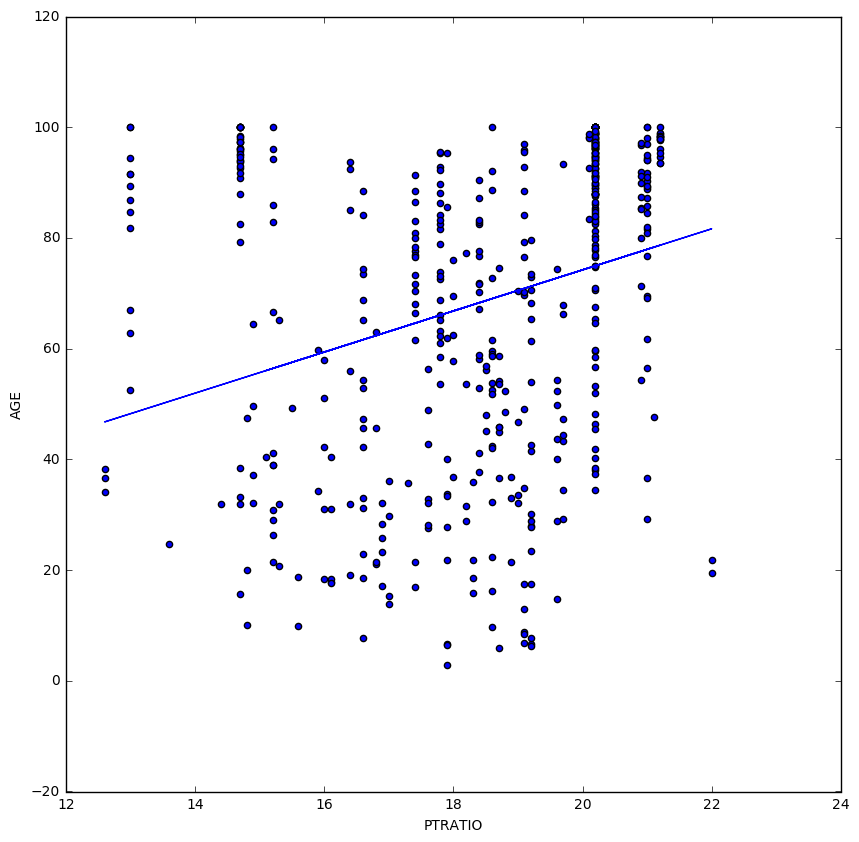

In [19]:
# Fit a line

X = df[["PTRATIO"]]
y = df["AGE"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print model.summary()
# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("AGE")
plt.xlabel("PTRATIO")

In [4]:
# Statsmodels makes it easy to get the score
print "r^2:", model.rsquared

r^2: 0.865805992741


In [10]:
from itertools import combinations
combos2 = list(combinations(list(df.columns),2))

lst = []
for pair in combos2:
    X = df[pair[0]]
    y = df[pair[1]]
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    lst.append([pair[1], pair[0], model.rsquared])
pd.DataFrame(lst, columns= ['y', 'x', 'r^2']).sort('r^2', ascending=False)


/Users/mwitebsky/anaconda2/envs/lesson01/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,y,x,r^2
54,PTRATIO,RM,0.965253
47,PTRATIO,NOX,0.954037
55,B,RM,0.933856
42,RM,NOX,0.933171
43,AGE,NOX,0.926235
75,B,PTRATIO,0.916093
46,TAX,NOX,0.915844
72,PTRATIO,TAX,0.881024
29,TAX,INDUS,0.867411
60,PTRATIO,AGE,0.865806


                            OLS Regression Results                            
Dep. Variable:                PTRATIO   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.403e+04
Date:                Wed, 12 Oct 2016   Prob (F-statistic):               0.00
Time:                        12:29:56   Log-Likelihood:                -1346.6
No. Observations:                 506   AIC:                             2695.
Df Residuals:                     505   BIC:                             2699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             2.8869      0.024    118.442      0.0

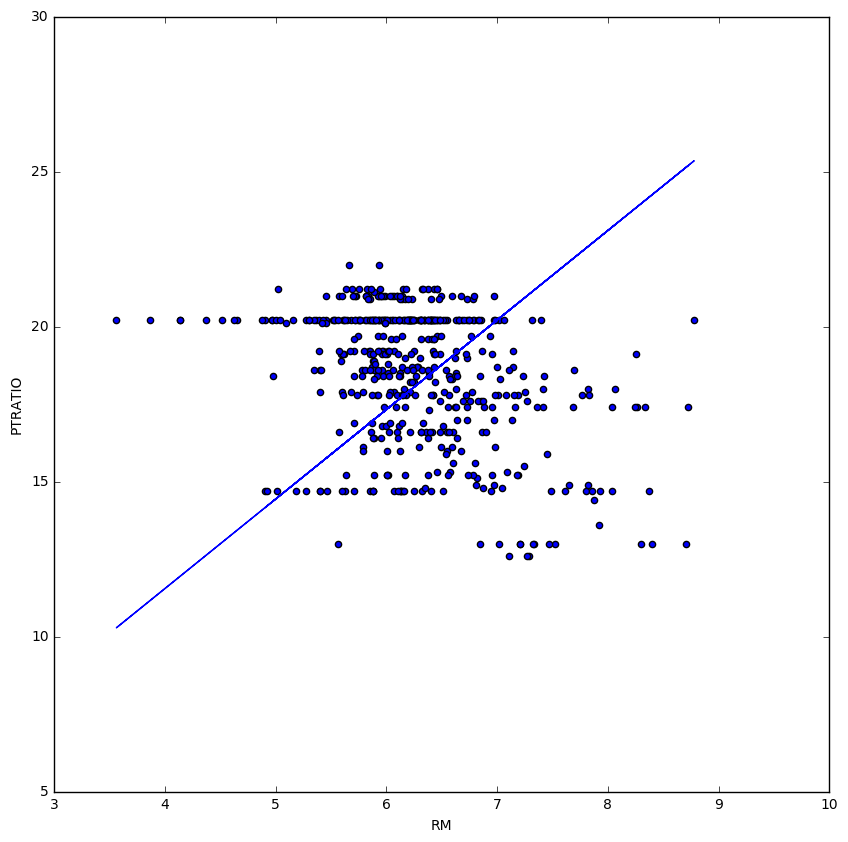

In [20]:
# Fit a line

X = df[["RM"]]
y = df["PTRATIO"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print model.summary()

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("PTRATIO")
plt.xlabel("RM")

# Statsmodels makes it easy to get the score
print "r^2:", model.rsquared

                            OLS Regression Results                            
Dep. Variable:                     ZN   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.007439
Date:                Wed, 12 Oct 2016   Prob (F-statistic):              0.931
Time:                        12:30:08   Log-Likelihood:                -2365.1
No. Observations:                 506   AIC:                             4732.
Df Residuals:                     505   BIC:                             4736.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM           0.0107      0.124      0.086      0.9

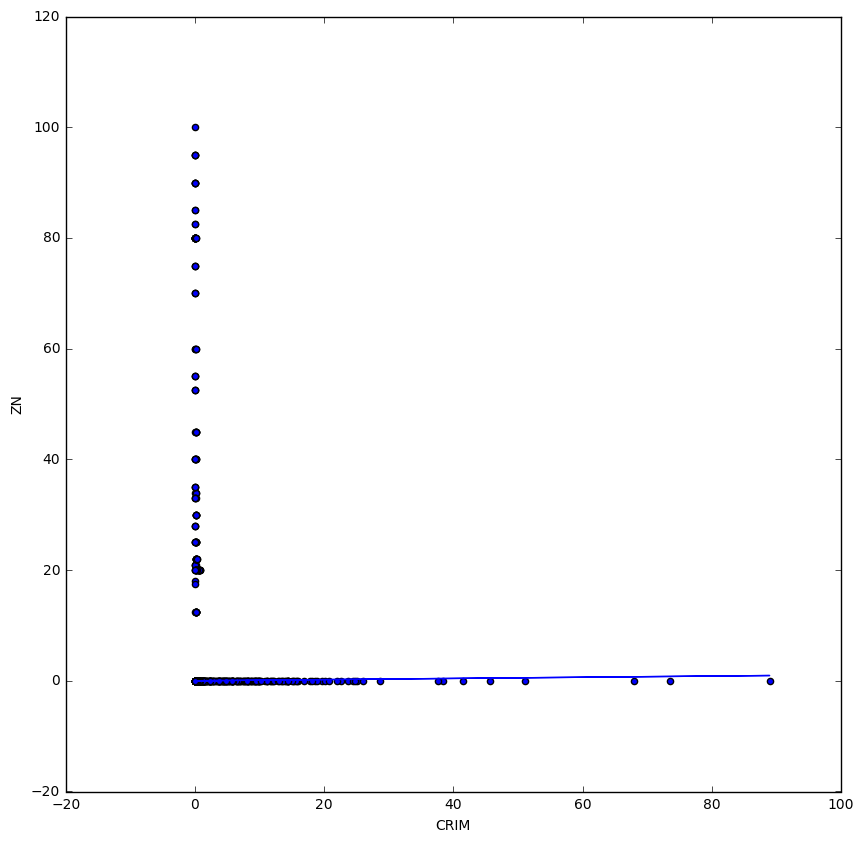

In [21]:
# Fit a line

X = df[["CRIM"]]
y = df["ZN"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print model.summary()
# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("ZN")
plt.xlabel("CRIM")

# Statsmodels makes it easy to get the score
print "r^2:", model.rsquared

In [57]:
df.head()
# from itertools import combinations
# import patsy 

# def regressions(df, y_var, ivs):
#     combos = list(combinations(df.drop(y_var, axis=1), ivs))
#     string = y_var + ' ~ combos[i][0]'
#     for j in range(1, ivs):
#         string += ' + combos[i][' + str(j) + ']'
#     lst= []
#     for i in range(len(combos)):
#         y, x = patsy.dmatrices('RM ~ combos[i][0] + combos[i][1] + combos[i][2] + combos[i][3]', data=df)
#         model = sm.OLS(y, x).fit()
#         lst.append([combos[i], model.mse_model])

# regressions(df, 'RM', 4)
        
#     pd.DataFrame(lst, columns=['x1', 'x2', 'x3', 'MSE']).sort_values('MSE', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
# Here's some quadratic data with a bit of noise
import scipy

noise = scipy.stats.norm(0, 4)
data = [(x, 3*x*x - 5*x + 3 + noise.rvs()) for x in np.arange(-6, 2, 0.5)]

xs = [x for (x, y) in data]
ys = [y for (x, y) in data]

0.99607983777118692

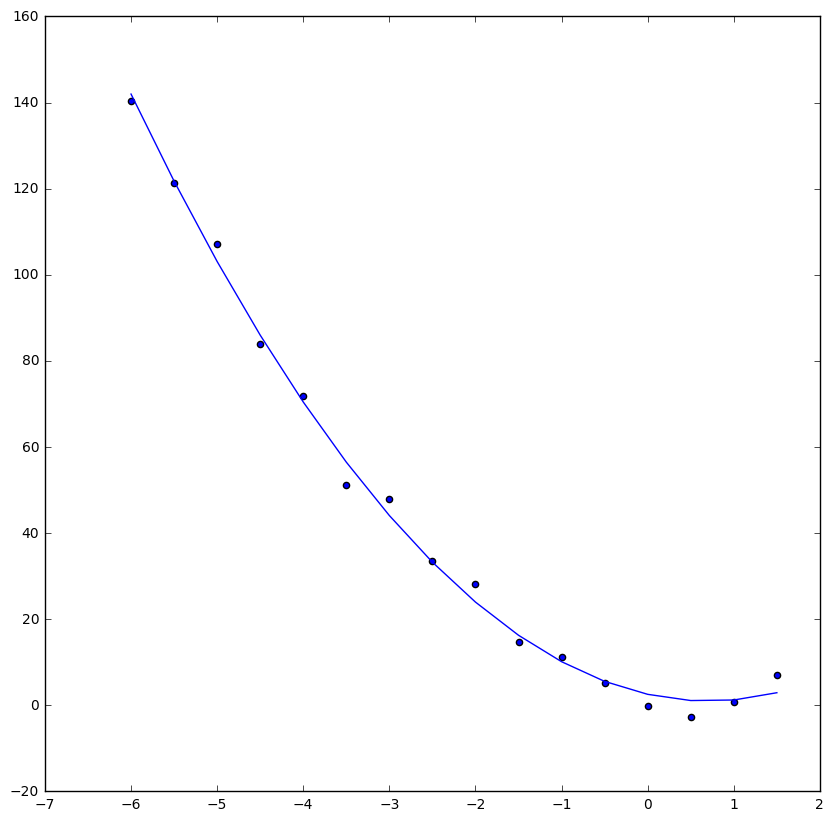

In [59]:
# Now let's fit a quadratic model with numpy
# polyfit gives us the coefficients of the best fit polynomial
coef = np.polyfit(xs, ys, deg=2)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)

0.88948787498731752

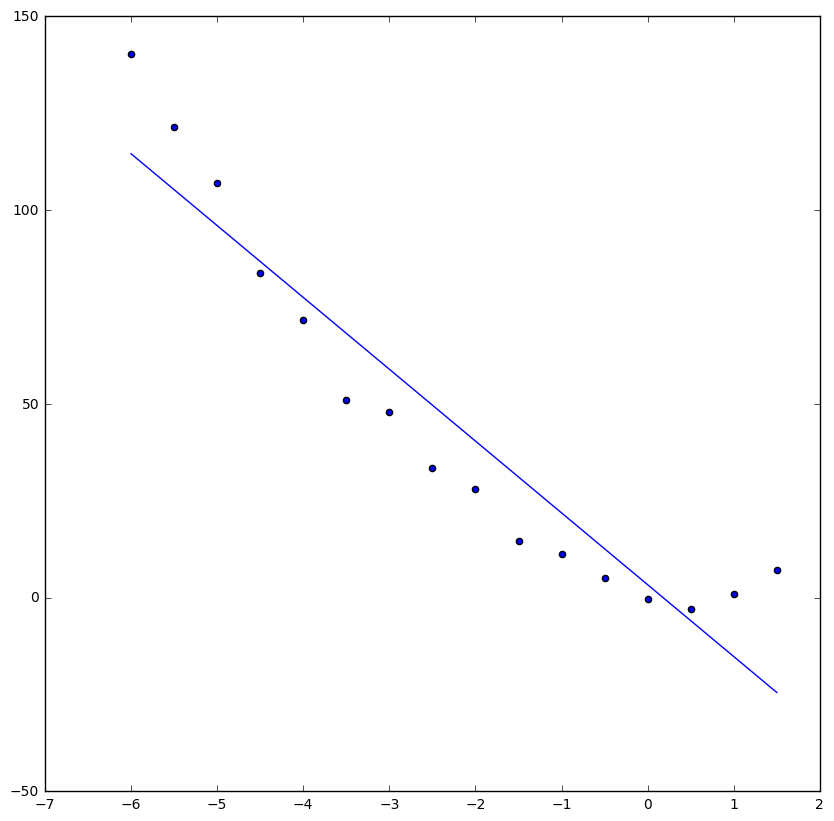

In [60]:
# Now let's fit a quadratic model with numpy
# polyfit gives us the coefficients of the best fit polynomial
coef = np.polyfit(xs, ys, deg=1)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)

In [61]:
xs.append(2)
ys.append(120)

0.80029497472161459

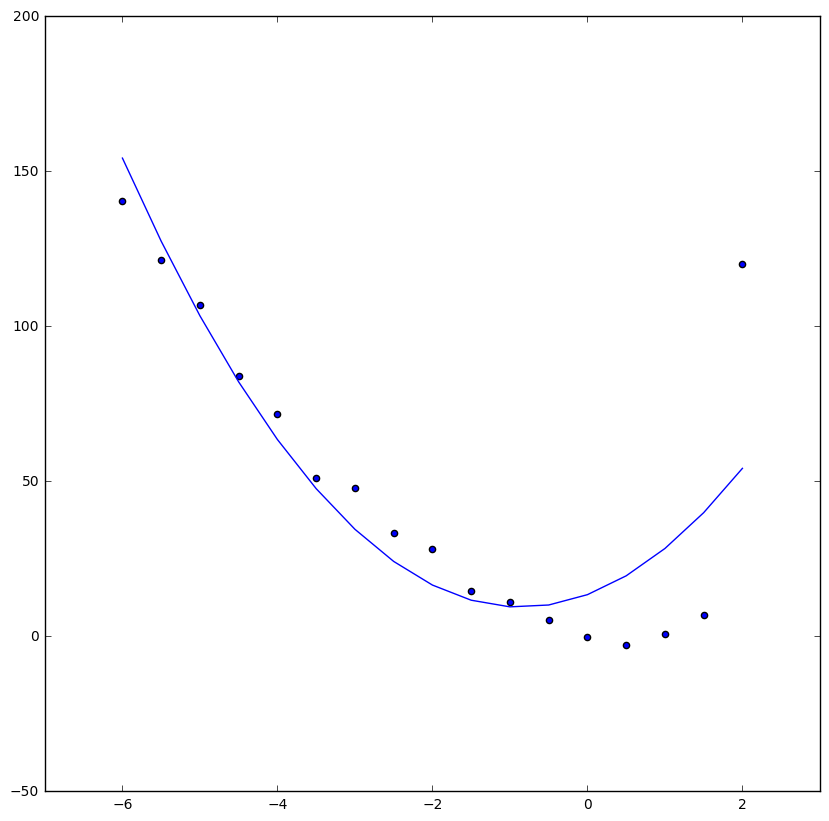

In [62]:
# Now let's fit a quadratic model with numpy
# polyfit gives us the coefficients of the best fit polynomial
coef = np.polyfit(xs, ys, deg=2)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)

0.41863403786162701

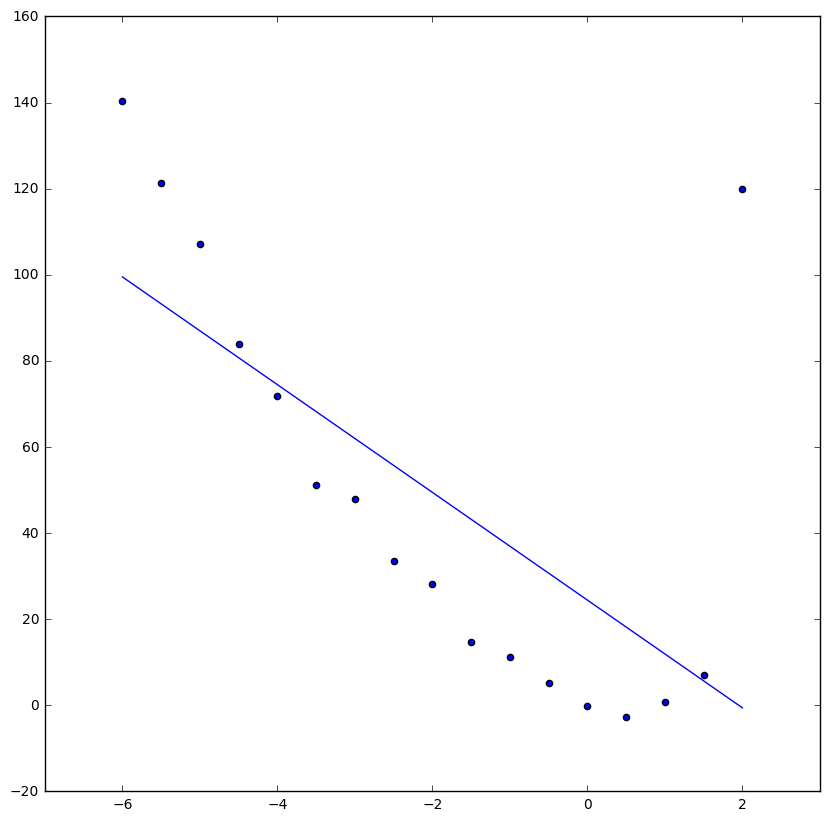

In [63]:
# Now let's fit a quadratic model with numpy
# polyfit gives us the coefficients of the best fit polynomial
coef = np.polyfit(xs, ys, deg=1)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

# Let's plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

# Here's another way to get r^2 from scipy
from sklearn import metrics
metrics.r2_score(ys, predictions)